<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_11/a)_GBM_Classifier_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries and Load Dataset

In [32]:
!pip install xgboost catboost lightgbm --quiet

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
import time
import matplotlib.pyplot as plt

In [19]:
# Load datasets
train_data = pd.read_csv('/content/Large_Movie_Review_sentiments.train.csv')
test_data = pd.read_csv('/content/Large_Movie_Review_sentiments.test.csv')

##Preparing Data

In [20]:
# Preprocess data
X_train = train_data['Review']
y_train = train_data['Label']
X_test = test_data['Review']
y_test = test_data['Label']

In [21]:
# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [22]:
# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Dictionary to store results
results = {}


##Define Models

In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Dictionary to store results
results = {}

##Train and Evaluate models

In [34]:
# Helper function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Predictions
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')

    # Save results
    results[model_name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Training Time (s)': training_time,
        'Prediction Time (s)': prediction_time,
    }

    print(f"Classification Report for {model_name}:\n")
    # Import classification_report here
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred)) # Now you can use it

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

# Train and evaluate each model
for name, model in models.items():
    train_and_evaluate_model(model, X_train_tfidf, y_train, X_test_tfidf, y_test, name)

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report for AdaBoost:

              precision    recall  f1-score   support

           0       0.84      0.76      0.80     12500
           1       0.78      0.85      0.82     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:20:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     12500
           1       0.92      0.96      0.94     12500

    accuracy                           0.94     25000
   macro avg       0.94      0.94      0.94     25000
weighted avg       0.94      0.94      0.94     25000

[LightGBM] [Info] Number of positive: 12500, number of negative: 12500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.334610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 489805
[LightGBM] [Info] Number of data points in the train set: 25000, number of used features: 9751
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.92      0.89     

##Results

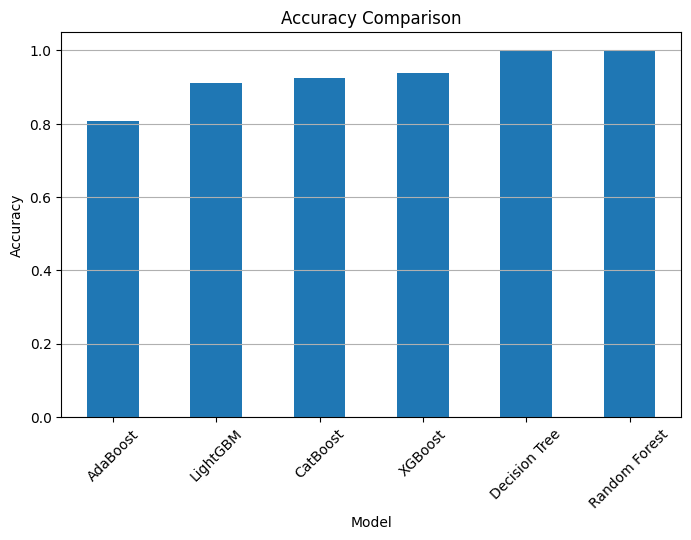

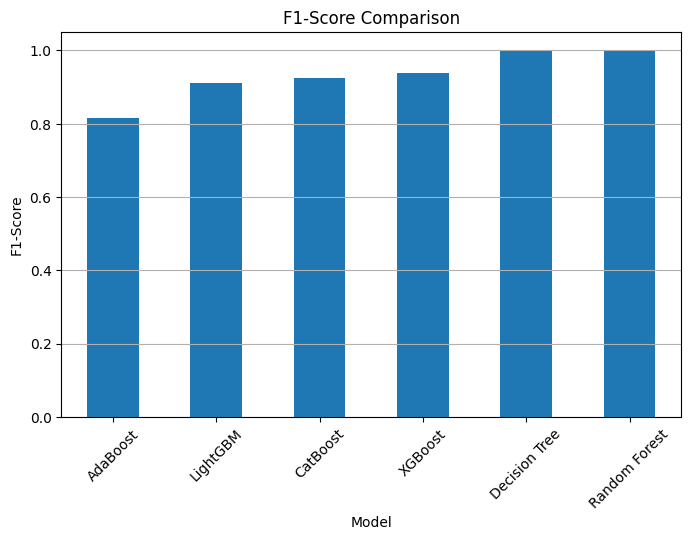

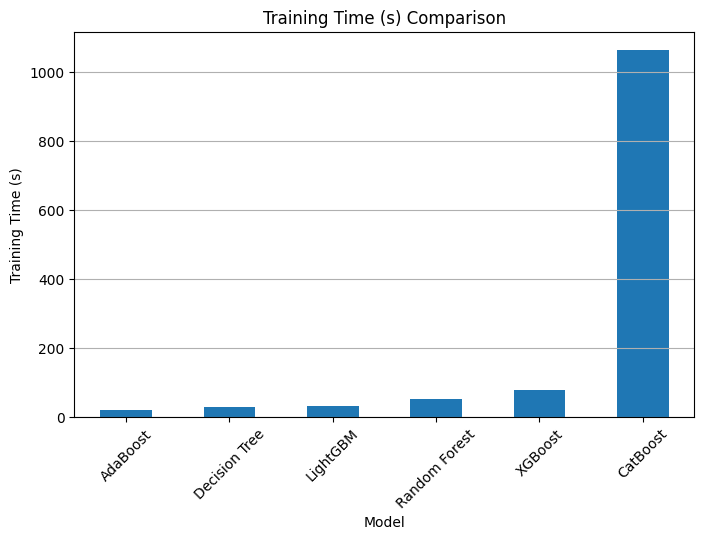

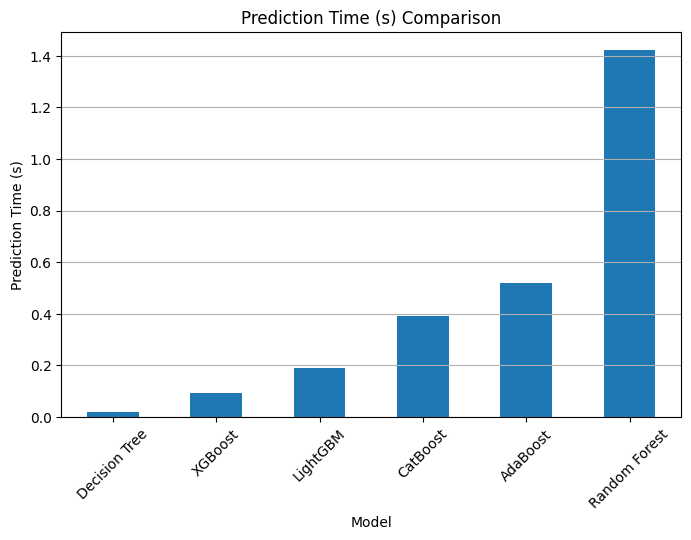

In [35]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Visualization
metrics = ['Accuracy', 'F1-Score', 'Training Time (s)', 'Prediction Time (s)']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    results_df[metric].sort_values().plot(kind='bar', title=f"{metric} Comparison", ylabel=metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
